Import packages

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # default figure size
plt.rcParams['font.size'] = 12           # default font size
plt.rcParams['font.family'] = 'Times New Roman'

Data preparation

In [16]:
df = pd.read_csv('../data/energydata_complete_cleaned.csv', parse_dates=['date'], index_col='date')
df.sort_index(inplace=True)
print('Data shape: ', df.shape)

# Define features and target variable
features = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
            'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 
            'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 
            'Visibility', 'Tdewpoint', 'rv1',
            'is_weekend', 'hour_sin', 'hour_cos', 'day_of_week_sin', 
            'day_of_week_cos', 'Appliances_lag1', 'Appliances_rolling_mean_6']
target = 'Appliances'
print('Feature number: ', len(features))

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Data shape:  (19591, 38)
Feature number:  33
Training data shape:  (13713, 33)
Testing data shape:  (5878, 33)


In [17]:
model_results = {}

Linear Regression

Linear Regression Coefficients:  [ 8.50024612e-01 -1.19981832e+01 -5.09217507e+00  8.49428132e+00
  3.38210212e+00  5.62765476e+00  1.08571538e+00 -2.40110156e+00
 -6.11879630e-01  4.18251034e-02 -8.07241999e-02 -1.42689179e+00
 -4.76281232e-02  8.97079852e-01 -2.46501677e-01  1.92809864e+00
  8.10654656e-01 -5.18642676e-01  5.49207660e-01  3.76892760e-01
 -4.78271397e-02  1.01340843e-01  3.26069826e-01 -9.55977945e-03
  3.57868675e-01 -3.07602938e-02 -5.44646852e+00 -1.32806407e+01
 -1.33216132e+01 -3.38858618e+00  1.44959965e+00  6.93826735e-01
  4.84600043e-02]
Linear Regreesion Mean Squared Error:  3729.309644003113
Linear Regreesion Root Mean Squared Error:  61.06807385208013
Linear Regreesion Mean Absolute Error:  27.09980484737401
Linear Regreesion R^2 Score:  0.5458538738987657


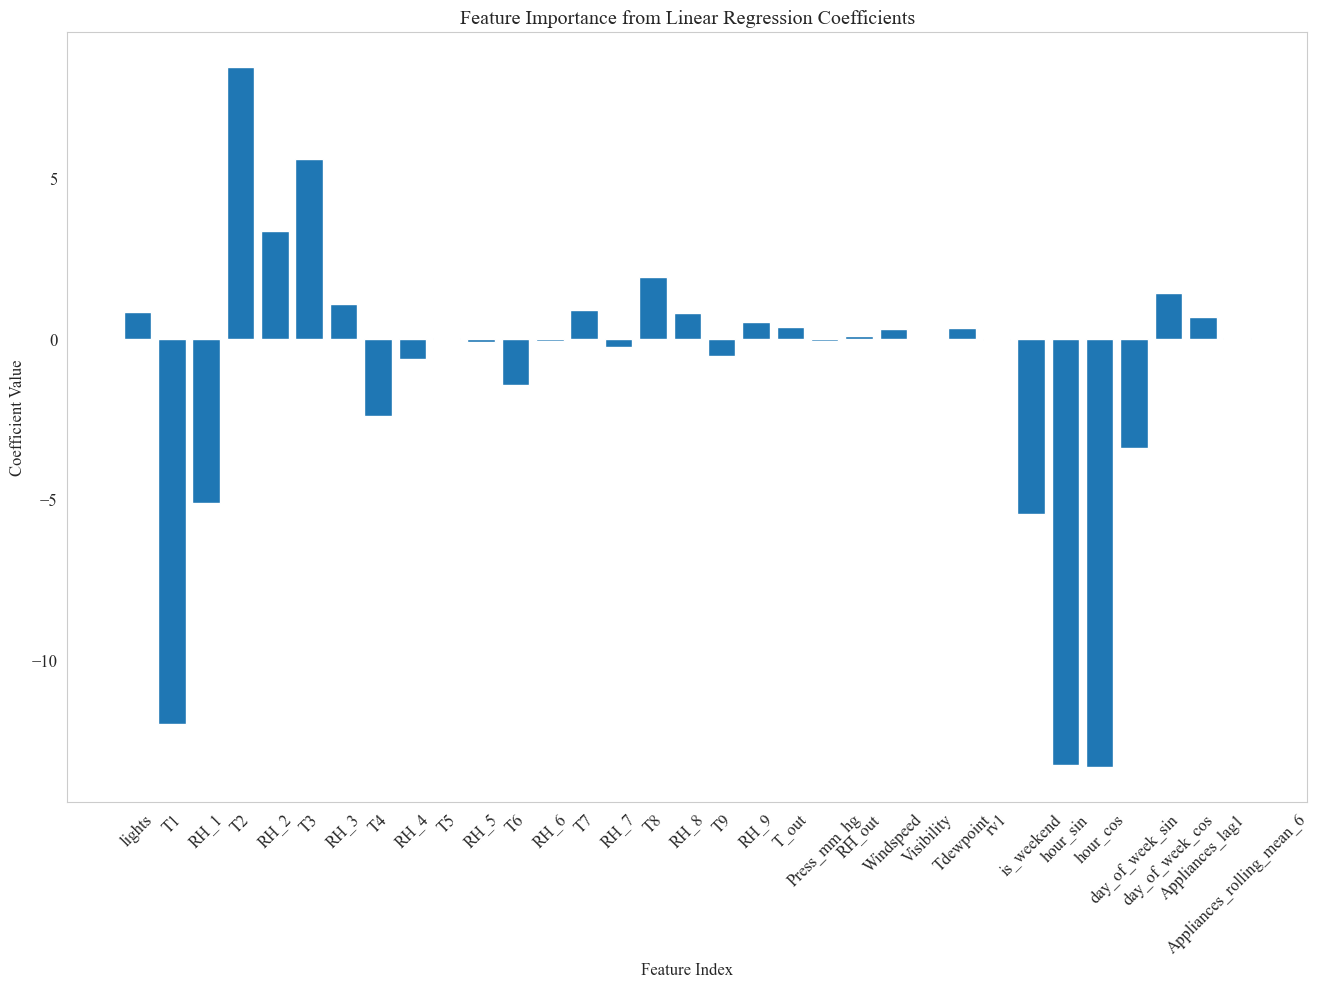

In [18]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
print("Linear Regression Coefficients: ", lin_reg.coef_)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regreesion Mean Squared Error: ", mse)
print("Linear Regreesion Root Mean Squared Error: ", rmse)
print("Linear Regreesion Mean Absolute Error: ", mae)
print("Linear Regreesion R^2 Score: ", r2)

# model_results['Linear Regression'] = {
#     'predictions': y_pred,
#     'MSE': mse,
#     'RMSE': rmse,
#     'MAE': mae,
#     'R2': r2
# }

# Feature coefficients analysis
importance = lin_reg.coef_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Linear Regression Coefficients')
plt.grid()
plt.show()

Support vector regression

In [19]:
svr = SVR(kernel='rbf', C=10)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR Mean Squared Error: ", mse_svr)
print("SVR Root Mean Squared Error: ", rmse_svr)
print("SVR Mean Absolute Error: ", mae_svr)
print("SVR R^2 Score: ", r2_svr)

model_results['Support Vector Regression'] = {
    'predictions': y_pred_svr,
    'MSE': mse_svr,
    'RMSE': rmse_svr,
    'MAE': mae_svr,
    'R2': r2_svr
}

SVR Mean Squared Error:  3740.1350292045217
SVR Root Mean Squared Error:  61.156643377514776
SVR Mean Absolute Error:  24.195377332559175
SVR R^2 Score:  0.5445355852013714


Decision Tree

In [20]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error: ", mse_dt)
print("Decision Tree Root Mean Squared Error: ", rmse_dt)
print("Decision Tree Mean Absolute Error: ", mae_dt)
print("Decision Tree R^2 Score: ", r2_dt)

# model_results['Decision Tree'] = {
#     'predictions': y_pred_dt,
#     'MSE': mse_dt,
#     'RMSE': rmse_dt,
#     'MAE': mae_dt,
#     'R2': r2_dt
# }

Decision Tree Mean Squared Error:  28982.88533514801
Decision Tree Root Mean Squared Error:  170.2436058568662
Decision Tree Mean Absolute Error:  93.02483838040149
Decision Tree R^2 Score:  -2.529464258715963


Random forest regression

Random Forest Mean Squared Error:  4109.857328924899
Random Forest Root Mean Squared Error:  64.1081689718627
Random Forest Mean Absolute Error:  32.42836639422241
Random Forest R^2 Score:  0.4995117158583545


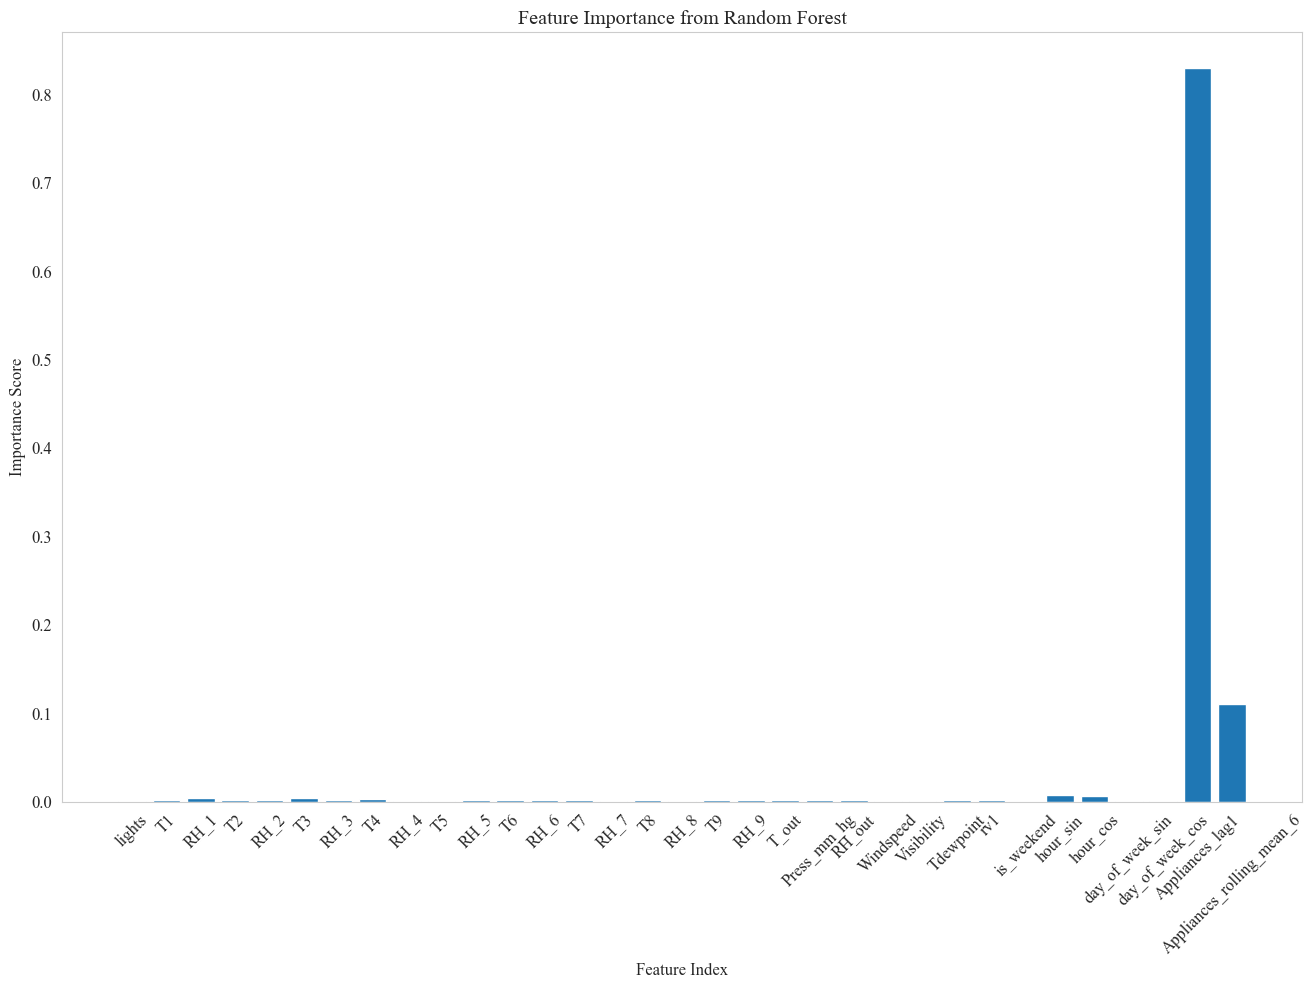

In [21]:
rf_reg = RandomForestRegressor(
    n_estimators = 100, 
    random_state = 42,
    max_depth = 5,
    min_samples_split = 10,
    min_samples_leaf = 5,
    max_features = 0.8,
)

rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error: ", mse_rf)
print("Random Forest Root Mean Squared Error: ", rmse_rf)
print("Random Forest Mean Absolute Error: ", mae_rf)
print("Random Forest R^2 Score: ", r2_rf)

model_results['Random Forest'] = {
    'predictions': y_pred_rf,
    'MSE': mse_rf,
    "RMSE": rmse_rf,
    'MAE': mae_rf,
    'R2': r2_rf
}

# Feature importance from Random Forest
importances = rf_reg.feature_importances_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(importances))], importances)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.grid()
plt.show()

XGBoost

XGBoost Mean Squared Error:  3622.432373046875
XGBoost Root Mean Squared Error:  60.1866455078125
XGBoost Mean Absolute Error:  27.256139755249023
XGBoost R^2 Score:  0.5588691234588623


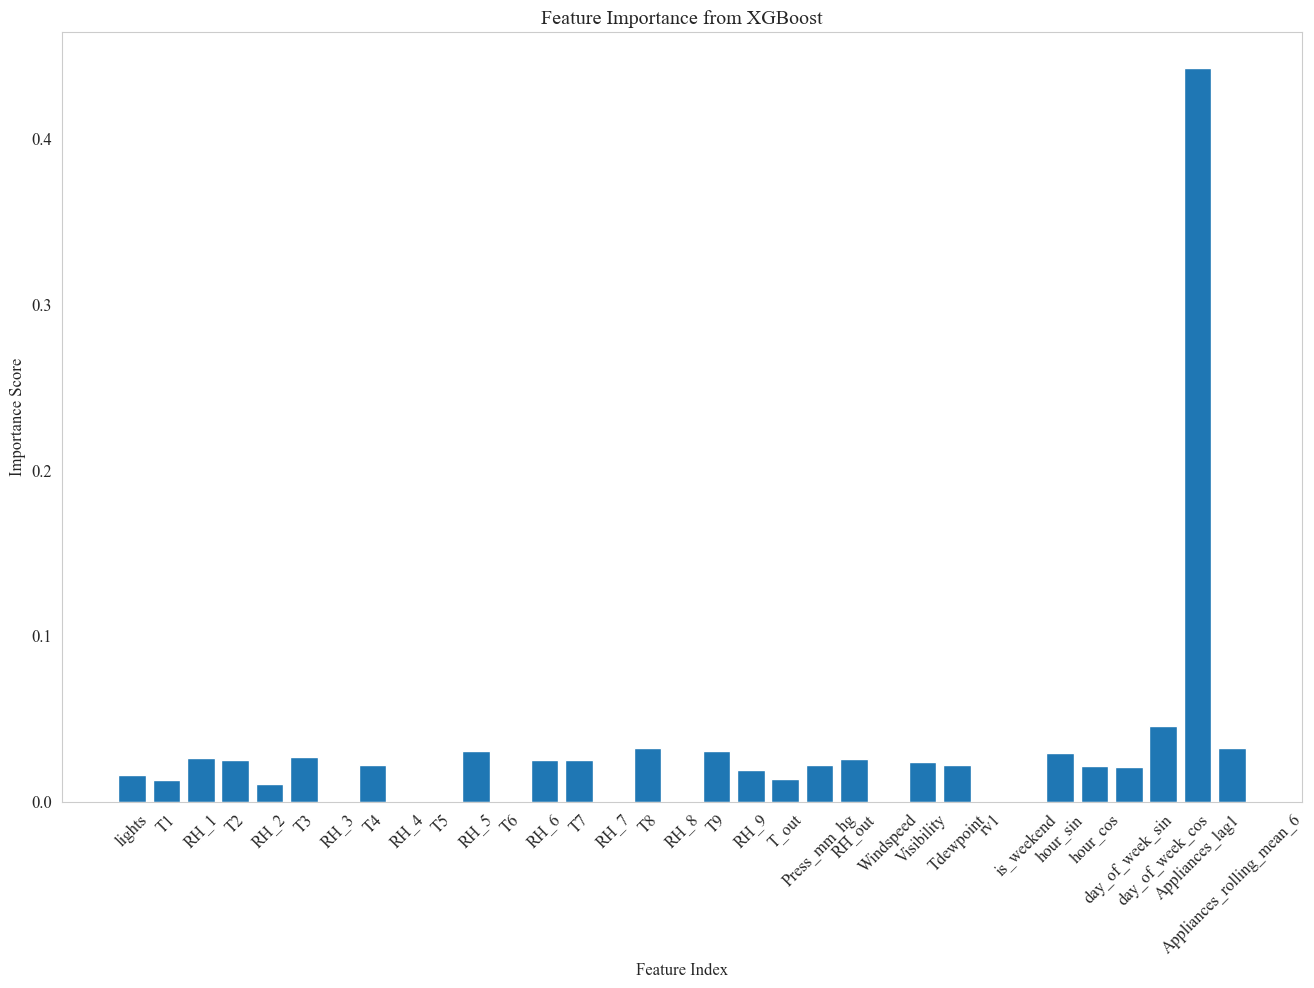

In [22]:
xgb_reg = xgb.XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.03, 
    max_depth = 3, 
    random_state = 42
)

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Mean Squared Error: ", mse_xgb)
print("XGBoost Root Mean Squared Error: ", rmse_xgb)
print("XGBoost Mean Absolute Error: ", mae_xgb)
print("XGBoost R^2 Score: ", r2_xgb)

model_results['XGBoost'] = {
    'predictions': y_pred_xgb,
    'MSE': mse_xgb,
    'RMSE': rmse_xgb,
    'MAE': mae_xgb,
    'R2': r2_xgb
}

# Feature importance from XGBoost
xgb_importances = xgb_reg.feature_importances_
plt.figure(figsize=(16,10))
plt.bar([x for x in range(len(xgb_importances))], xgb_importances)
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance from XGBoost')
plt.grid()
plt.show()

Multi-layer Perceptron

In [23]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    random_state=42,
    max_iter=100,
    early_stopping=True,
    learning_rate_init=0.001
)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = root_mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print("MLP Mean Squared Error: ", mse_mlp)
print("MLP Root Mean Squared Error: ", rmse_mlp)
print("MLP Mean Absolute Error: ", mae_mlp)
print("MLP R^2 Score: ", r2_mlp)

model_results['Multi-layer Perceptron'] = {
    'predictions': y_pred_mlp,
    'MSE': mse_mlp,
    'RMSE' : rmse_mlp,
    'MAE': mae_mlp,
    'R2': r2_mlp
}

MLP Mean Squared Error:  3666.9376325142125
MLP Root Mean Squared Error:  60.555244467463034
MLP Mean Absolute Error:  26.913998148016415
MLP R^2 Score:  0.5534493835503644


Results and visualisation

In [24]:
results_comparison = pd.DataFrame({
    model: {
        'MSE': metrics['MSE'],
        'RMSE': metrics['RMSE'],
        'MAE': metrics['MAE'],
        'R2': metrics['R2']
    }
    for model, metrics in model_results.items()
}).T.round(4)

print("Model Performance Metrics Comparison:")
print(results_comparison)

Model Performance Metrics Comparison:
                                 MSE     RMSE      MAE      R2
Support Vector Regression  3740.1350  61.1566  24.1954  0.5445
Random Forest              4109.8573  64.1082  32.4284  0.4995
XGBoost                    3622.4324  60.1866  27.2561  0.5589
Multi-layer Perceptron     3666.9376  60.5552  26.9140  0.5534


Energy Consumption Prediction Comparison Across Models

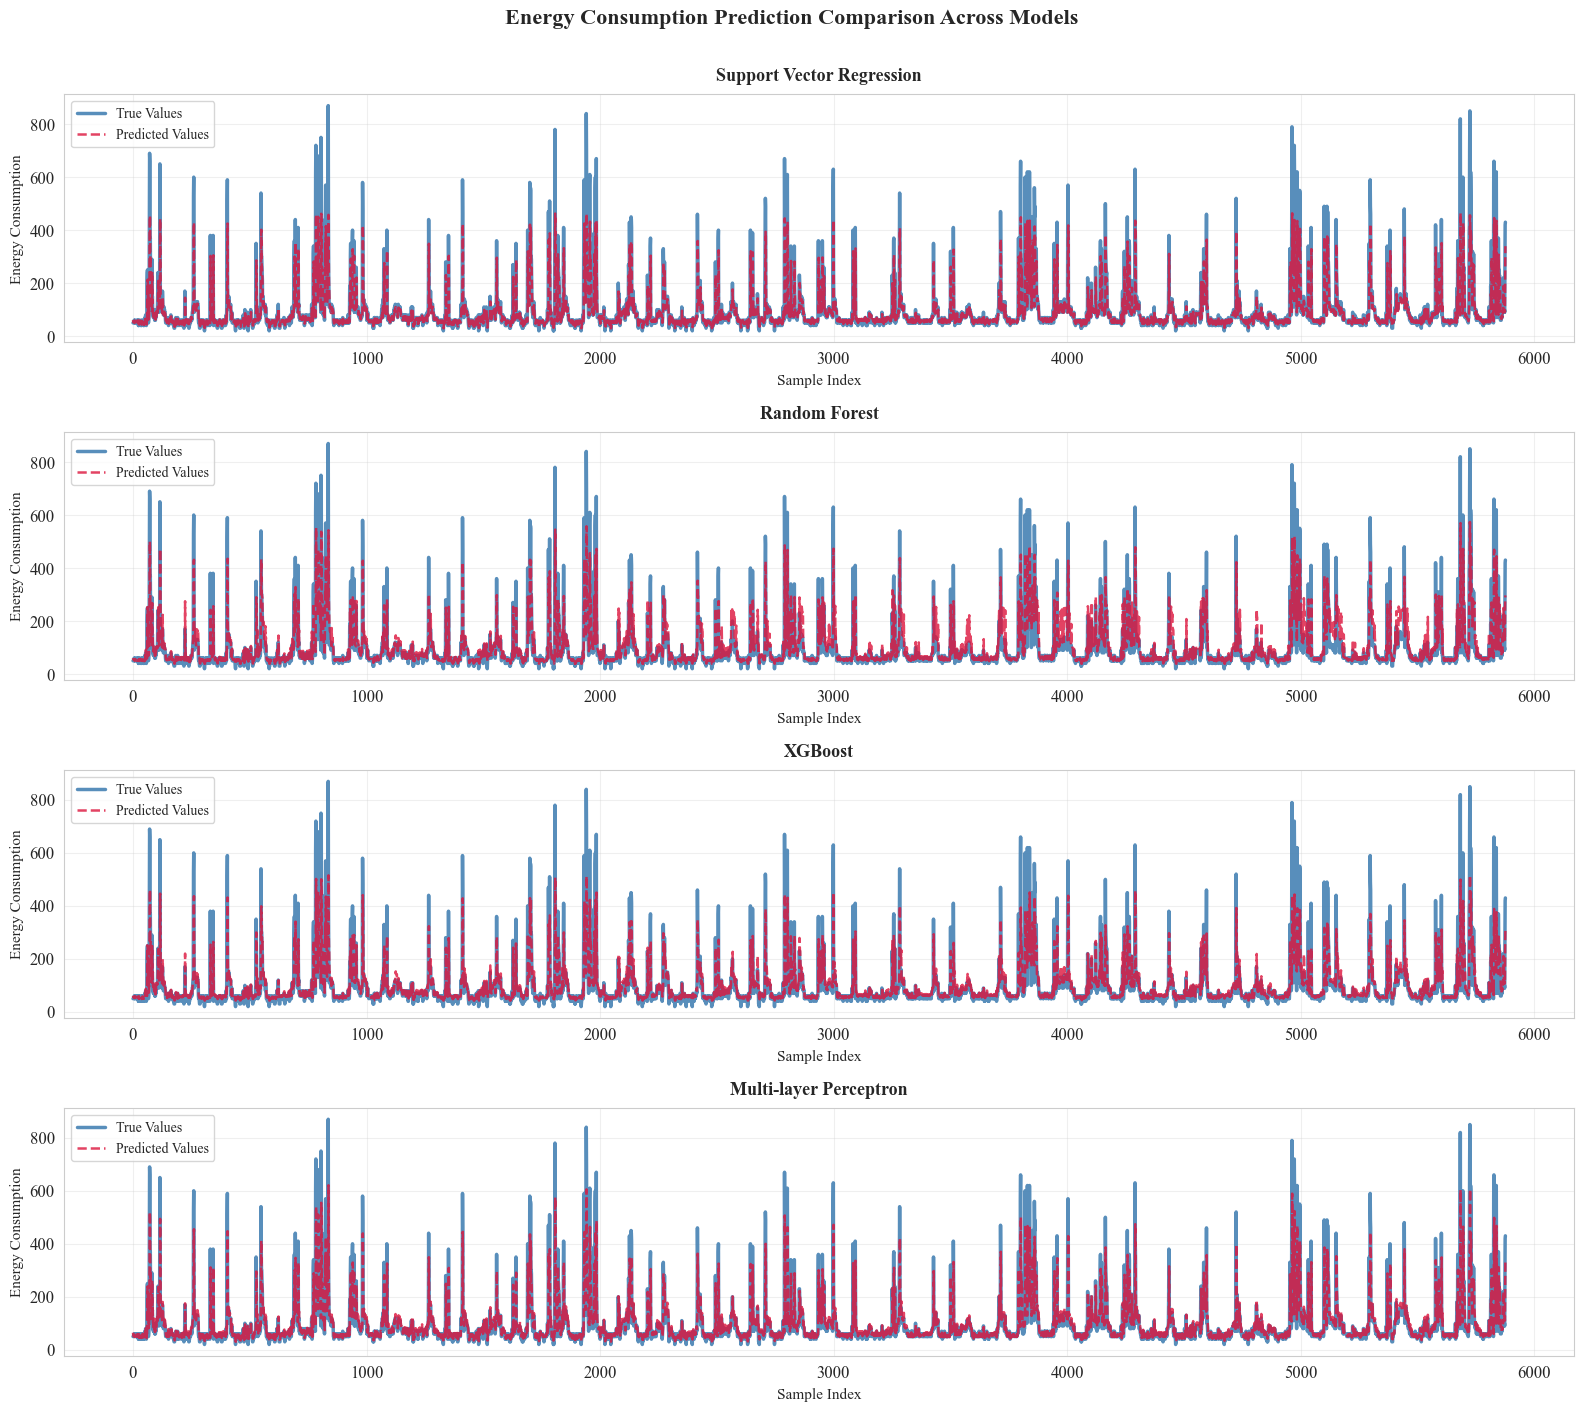

In [25]:
plt.figure(figsize=(16, 20))

for idx, (model_name, results) in enumerate(model_results.items(), 1):
    plt.subplot(6, 1, idx)

    y_pred = results['predictions']

    plt.plot(range(len(y_test)), y_test.values,
             'steelblue', linewidth=2.5, label='True Values', alpha=0.9)
    plt.plot(range(len(y_test)), y_pred,
             'crimson', linestyle='--', linewidth=1.8, label='Predicted Values', alpha=0.8)

    plt.title(f'{model_name}', fontsize=13, fontweight='bold', pad=10)
    plt.xlabel('Sample Index', fontsize=11)
    plt.ylabel('Energy Consumption', fontsize=11)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Energy Consumption Prediction Comparison Across Models', fontsize=16, fontweight='bold', y=1.02)
plt.savefig('../results/prediction_plots/model_predictions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Model performance comparison

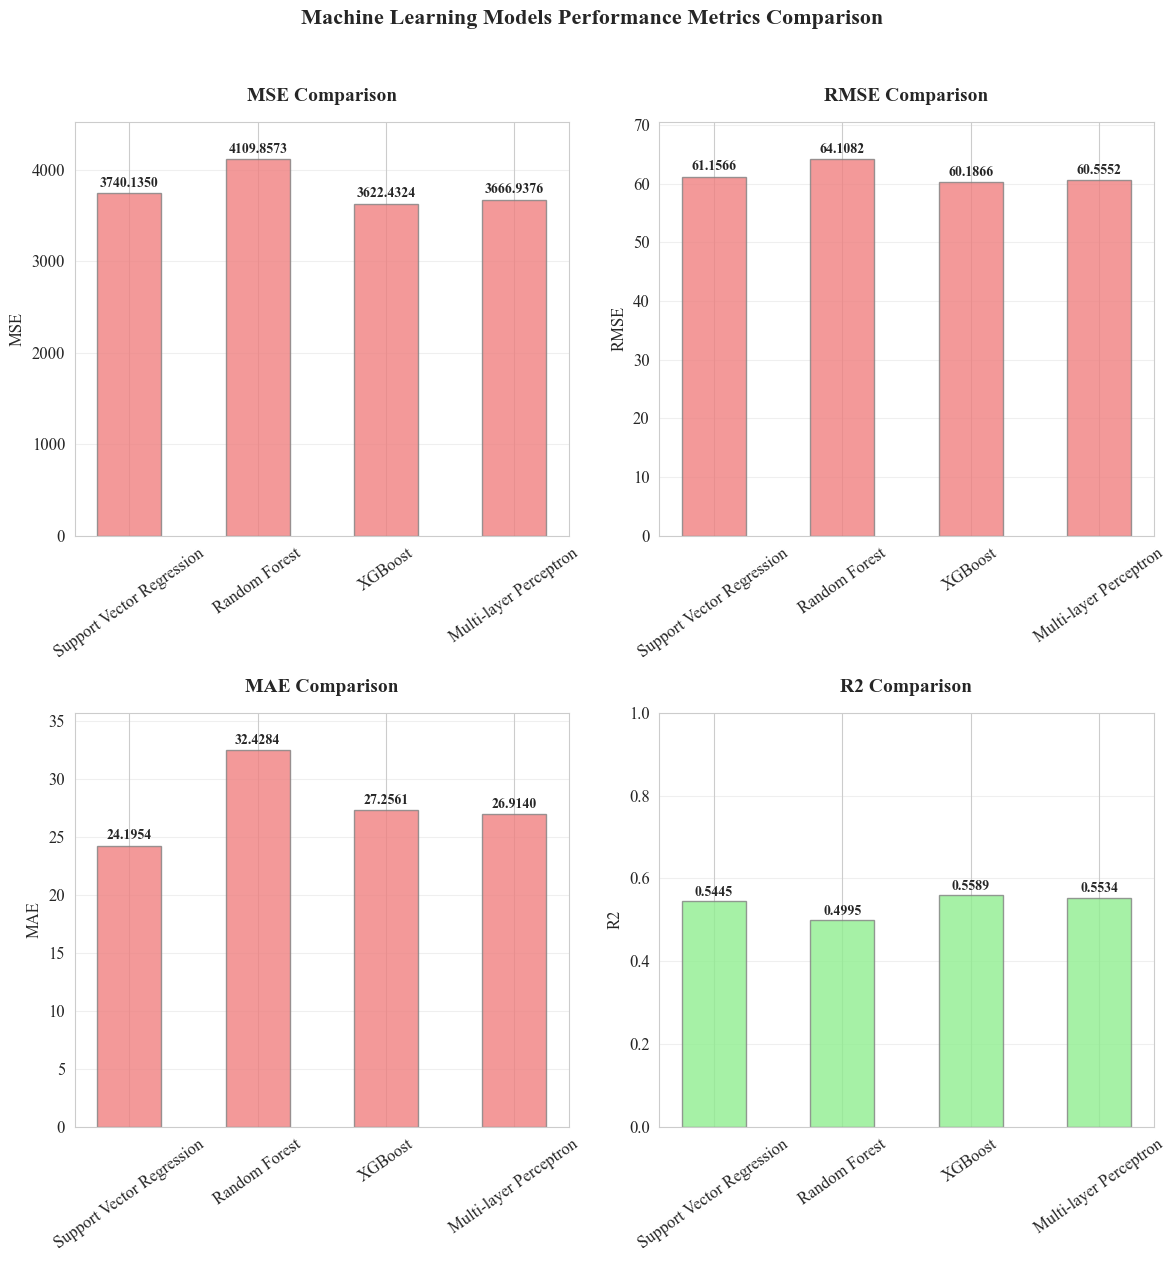

In [26]:
metric_names = ['MSE', 'RMSE', 'MAE', 'R2']
model_names = list(model_results.keys())

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, metric in enumerate(metric_names):
    row = i // 2
    col = i % 2

    metric_values = [model_results[model][metric] for model in model_names]

    bar_colors = ['lightcoral' if metric in ['MSE', 'RMSE', 'MAE'] else 'lightgreen' for _ in model_names]

    bars = axes[row, col].bar(model_names, metric_values, width=0.5, color=bar_colors, alpha=0.8, edgecolor='grey')
    axes[row, col].set_title(f'{metric} Comparison', fontsize=14, fontweight='bold', pad=15)
    axes[row, col].set_ylabel(metric, fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=35)
    axes[row, col].grid(True, alpha=0.3, axis='y')
    if metric in ['MSE', 'RMSE', 'MAE']:
        axes[row, col].set_ylim(0, max(metric_values) * 1.1)
    elif metric == 'R2':
        axes[row, col].set_ylim(0, 1)

    for bar, value in zip(bars, metric_values):
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width() / 2., height + max(metric_values) * 0.01,
                             f'{value:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.suptitle('Machine Learning Models Performance Metrics Comparison', fontsize=16, fontweight='bold', y=1.05)
plt.savefig('../results/prediction_plots/model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Predicted vs True Values Scatter Plot

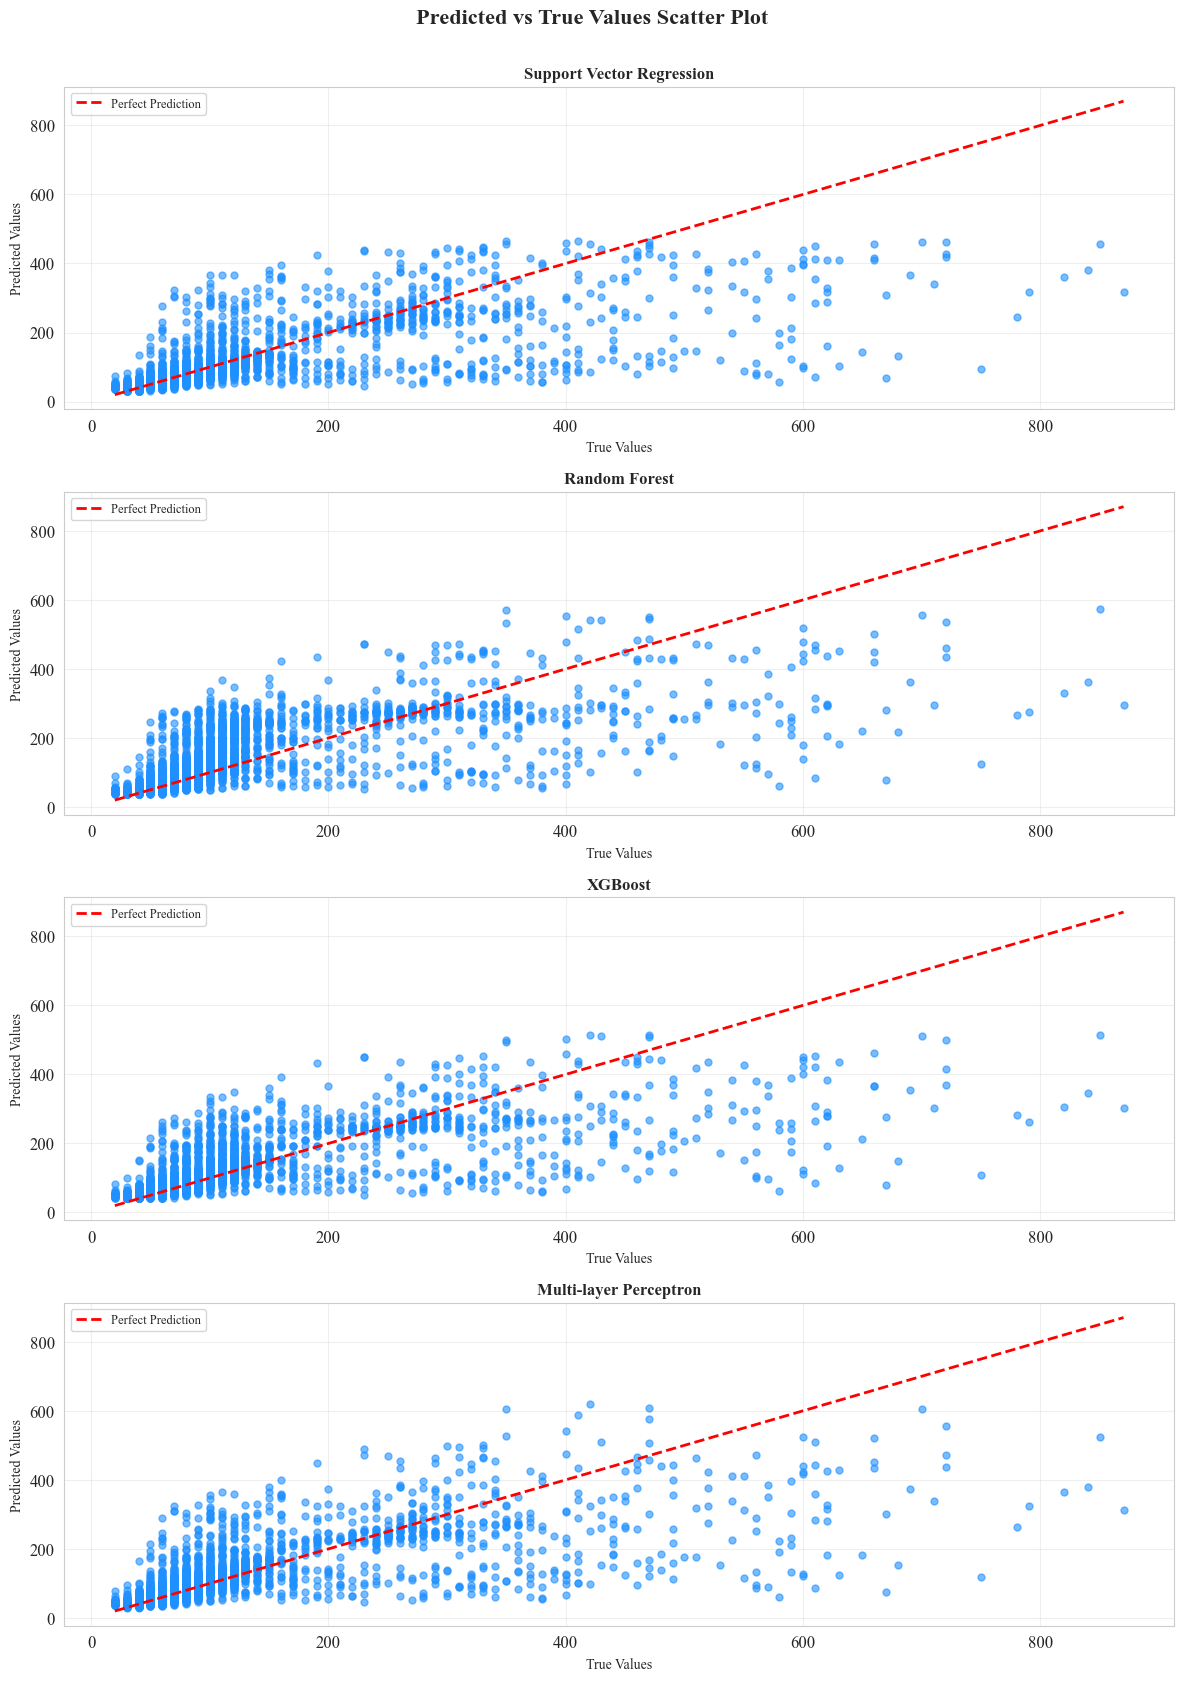

In [27]:
fig, axes = plt.subplots(5, 1, figsize=(12, 20))
axes = axes.ravel()

for idx, (model_name, results) in enumerate(model_results.items()):
    y_pred = results['predictions']

    axes[idx].scatter(y_test, y_pred, alpha=0.6, s=25, color='dodgerblue')

    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'red', linestyle='--',
                   linewidth=2, label='Perfect Prediction')

    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('True Values', fontsize=10)
    axes[idx].set_ylabel('Predicted Values', fontsize=10)
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(model_results), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Predicted vs True Values Scatter Plot', fontsize=16, fontweight='bold', y=1.02)
plt.show()

Model performance ranking

In [28]:
r2_rankings = sorted(model_results.items(), key=lambda x: x[1]['R2'], reverse=True)
print("\nR² Score Ranking (Higher is Better):")
for rank, (model, metrics) in enumerate(r2_rankings, 1):
    print(f"  Rank {rank}: {model:25} R² = {metrics['R2']:.4f}")

mse_rankings = sorted(model_results.items(), key=lambda x: x[1]['MSE'])
print("\nMSE Ranking (Lower is Better):")
for rank, (model, metrics) in enumerate(mse_rankings, 1):
    print(f"  Rank {rank}: {model:25} MSE = {metrics['MSE']:.4f}")

rmse_rankings = sorted(model_results.items(), key=lambda x: x[1]['RMSE'])
print("\nRMSE Ranking (Lower is Better):")
for rank, (model, metrics) in enumerate(rmse_rankings, 1):
    print(f"  Rank {rank}: {model:25} RMSE = {metrics['RMSE']:.4f}")

mae_rankings = sorted(model_results.items(), key=lambda x: x[1]['MAE'])
print("\nMAE Ranking (Lower is Better):")
for rank, (model, metrics) in enumerate(mae_rankings, 1):
    print(f"  Rank {rank}: {model:25} MAE = {metrics['MAE']:.4f}")

best_r2_model = r2_rankings[0][0]
best_mse_model = mse_rankings[0][0]
best_rmse_model = rmse_rankings[0][0]
best_mae_model = mae_rankings[0][0]

print("\n" + "Best Model Summary " + "=" * 40)
print(f"  Best R² Model:  {best_r2_model} (R² = {model_results[best_r2_model]['R2']:.4f})")
print(f"  Best MSE Model: {best_mse_model} (MSE = {model_results[best_mse_model]['MSE']:.4f})")
print(f"  Best RMSE Model: {best_rmse_model} (RMSE = {model_results[best_rmse_model]['RMSE']:.4f})")
print(f"  Best MAE Model: {best_mae_model} (MAE = {model_results[best_mae_model]['MAE']:.4f})")

top_models = {best_r2_model, best_mse_model, best_mae_model}
if len(top_models) == 1:
    overall_best = list(top_models)[0]
    print(f"\nOverall Best Model: {overall_best}")
    print(f"  This model performs best on all three metrics!")
else:
    print(f"\nDifferent models excel in different metrics:")
    print(f"  - For prediction accuracy → Choose {best_r2_model} (Highest R²)")
    print(f"  - For error control → Choose {best_mse_model} (Lowest MSE)")


R² Score Ranking (Higher is Better):
  Rank 1: XGBoost                   R² = 0.5589
  Rank 2: Multi-layer Perceptron    R² = 0.5534
  Rank 3: Support Vector Regression R² = 0.5445
  Rank 4: Random Forest             R² = 0.4995

MSE Ranking (Lower is Better):
  Rank 1: XGBoost                   MSE = 3622.4324
  Rank 2: Multi-layer Perceptron    MSE = 3666.9376
  Rank 3: Support Vector Regression MSE = 3740.1350
  Rank 4: Random Forest             MSE = 4109.8573

RMSE Ranking (Lower is Better):
  Rank 1: XGBoost                   RMSE = 60.1866
  Rank 2: Multi-layer Perceptron    RMSE = 60.5552
  Rank 3: Support Vector Regression RMSE = 61.1566
  Rank 4: Random Forest             RMSE = 64.1082

MAE Ranking (Lower is Better):
  Rank 1: Support Vector Regression MAE = 24.1954
  Rank 2: Multi-layer Perceptron    MAE = 26.9140
  Rank 3: XGBoost                   MAE = 27.2561
  Rank 4: Random Forest             MAE = 32.4284

Best Model Summary ========================================
